# Flume testing

Flume test will confirm debris rack angling for the final design.

### Overall Hypothesis
Including a horizontal angle to the debris rack, increases the maximum vertical angle allowed for debris to pass.

### Method
1. Confirm the angle calculations using a known debris piece.
2. Test the angle of the debris rack with and without the horizontal angle for each angle.



In [32]:
# 1
from mech_module import *

debris_length = 0.01 # in m
debris_rho = 350 # in kg/m^3
depth = 0.08 # in m

# record data
flat_angles = [70,70,65,60,60,50,30] # in degrees from horizontal
# 2
angled_angles = [10,34,56,78,80] # in degrees from horizontal
flow = [1.2,1.2,1.2,1.2,1.2,1.2,1.2] # in L/s
height = [] # in m (0.08m = 8cm)

# calculate the velocities from the flow using L/s and height in flume
velocities = []
for i in range(len(flow)):
    velocities.append(flow[i]/(height[i]*depth*1000))

froude = []
for i in range(len(velocities)):
    froude.append(froude_number(velocities[i], depth))

# calculate the expected maximum angle for each velocity
exp_angles = []
for i in range(len(velocities)):
    exp_angles.append(-debris_angle(velocities[i], debris_length, debris_rho))

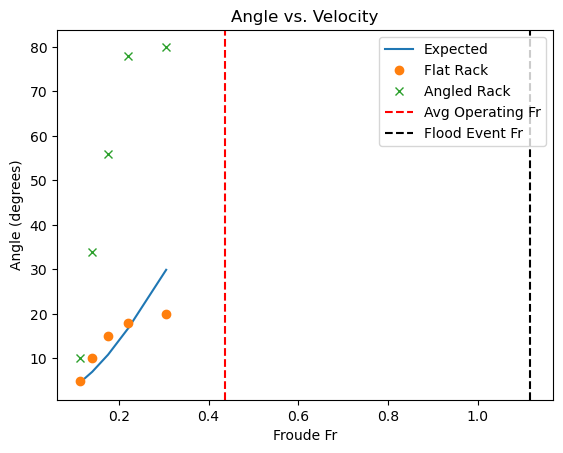

In [33]:
# present data
# plot the velocity on the x-axis and the angle on the y-axis 
plt.figure()
plt.plot(froude, exp_angles, '-', label='Expected')
plt.plot(froude, flat_angles, 'o', label='Flat Rack')
plt.plot(froude, angled_angles, 'x', label='Angled Rack')
plt.legend()
plt.xlabel('Froude Fr')
plt.ylabel('Angle (degrees)')
plt.title('Angle vs. Velocity')

# plot a vertical dashed line at the average operating Froude number and the flood event Froude number
avg_froude = 0.437
flood_froude = 1.117
plt.axvline(x=avg_froude, color='r', linestyle='--', label='Avg Operating Fr')
plt.axvline(x=flood_froude, color='k', linestyle='--', label='Flood Event Fr')
plt.legend()
plt.show()
